In [ ]:
import os
import numpy
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
import os

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
file_name = "CAT_final_2"
def remove_dot_cat(file_name):
    Folders =[file_name]
    new_data = []

    for c in Folders:
        for i in range(len(Folders)):
            path1 = '/disk0/' + Folders[i] + '/'
            data = os.listdir(path1)
            for img_name in data:
                if 'cat' not in img_name:
                    img_name = '/disk0/'+ c + '/' + img_name
                    new_data.append(img_name)
                #else:
                    #img_name = '/disk0/'+ c + '/' + img_name
                    #img_name = img_name.replace('.cat', '')
                    #new_data.append(img_name)
    return new_data
new_data_x = remove_dot_cat(file_name)

In [ ]:
new_data_x.sort()
X_full = [image.imread(new_data_x[i]) for i in range(len(new_data_x))]
X_full = numpy.array(X_full, dtype=object)

In [ ]:
def create_y_data(new_data_x):
    new_data_y = [s + ".cat" for s in new_data_x]
    for i in range(len(new_data_y)):
        if not os.path.exists(new_data_y[i]):
            del new_data_x[i]
            del new_data_y[i]
    return new_data_y

new_data_y = create_y_data(new_data_x)

In [ ]:
def read_y_data(y_data):
    Y_full = []
    for i in range(len(y_data)):
        with open(y_data[i]) as f:
            Y_full.append(f.read())
            f.close()
        
    for i in range(len(Y_full)):
        Y_full[i] = Y_full[i].split()

    return numpy.array(Y_full, dtype=numpy.half)

Y_full = read_y_data(new_data_y)

for i in range(len(Y_full)):
    for m in range(19):
        if m%2 ==1:
            Y_full[i][m] = Y_full[i][m]*(256./X_full[i].shape[1])
        else:
            Y_full[i][m] = Y_full[i][m]*(256./X_full[i].shape[0])

In [ ]:
from PIL import Image as im

def rewrite(images, image_names, labels, file_progenitor):
    for i in range(len(images)):
        index = 19
        write_path = image_names[i].replace(file_progenitor, 'CAT_final_2')
        write_path = write_path[:index] + str(file_progenitor) + '_' + write_path[index:]
        print(write_path)
        array_image = im.fromarray(images[i])
        array_image.save(write_path)
        labels[i].tofile(write_path.replace('.jpg', '.csv'), sep=',', format='%i' )
        
rewrite(X_full, new_data_x, Y_full, file_name)

In [ ]:
import os
import csv

def find_csv(file_name):
    path1 = '/disk0/' + file_name + '/'
    data = os.listdir(path1)
    new_data = []
    
    for csv_name in data:
        if '.csv' in csv_name:
            csv_name = path1 + csv_name
            new_data.append(csv_name)
    
    new_data.sort()
    csv_values = []
    for i in new_data:
        with open(i) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                csv_values.append(row)
            csv_file.close
    return csv_values

csv_values = find_csv('CAT_final_2')

In [ ]:
import numpy as np
csv_values = np.array(csv_values, np.uint8)
csv_values=np.delete(csv_values, 0, 1)

In [ ]:
print(csv_values[0][::2])
print(csv_values[0][::-2])
print(csv_values[0])

In [2]:
#Find boxes, 
#apply Y values to boxes
def find_jpg(file_name):
    path1 = '/disk0/' + file_name + '/'
    data = os.listdir(path1)
    new_data = []
    
    for img_name in data:
        if '.jpg' in img_name:
            img_name = path1 + img_name
            new_data.append(img_name)
    
    new_data.sort()
    return new_data

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface.xml')
face_cascade_ext = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface_extended.xml')


def haar_values(file):
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    faces = face_cascade.detectMultiScale(img, 1.03, 3)
    faces_ext = face_cascade_ext.detectMultiScale(img, 1.05, 3)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        #roi_gray = gray[y:y+h, x:x+w]
        #roi_color = img[y:y+h, x:x+w]'
    
    for (x,y,w,h) in faces_ext:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        #roi_gray = gray[y:y+h, x:x+w]
        #roi_color = img[y:y+h, x:x+w]
        
    plt.imshow(img)
    plt.show
    
    return faces
images = find_jpg('CAT_final_2')

KeyboardInterrupt: 

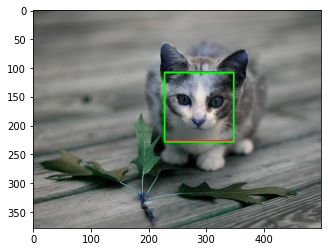

In [7]:
faces_boxes = []
for image in images:
    faces_boxes.append(haar_values(image))

print(faces_boxes)

In [ ]:
box_values = []
#format is XMid, YMid, XOffest, Y_offset
for i in range(len(csv_values)):
    temp_values = []
    x_max = numpy.amax(csv_values[i][::2])
    y_max = numpy.amax(csv_values[i][::-2])
    x_min = numpy.amin(csv_values[i][::2])
    y_min = numpy.amin(csv_values[i][::-2])
    mid_x = (int(x_max) + int(x_min))/2
    mid_y = (int(y_max) + int(y_min))/2
    offset_x = (int(x_max) - int(x_min))/2
    offset_y = (int(y_max) - int(y_min))/2
    temp_values.append(mid_x)
    temp_values.append(mid_y)
    temp_values.append(offset_x)
    temp_values.append(offset_y)
    box_values.append(temp_values)


In [ ]:
box_values=np.array(box_values, np.float)
for i in range(len(box_values)):
    write_path=new_data_x[i].replace('CAT_final_2', 'CAT_BOX_VALUES')
    box_values[i].tofile(write_path, sep=',', format='%f' )

In [ ]:
box_values=np.array(box_values, np.float)
mean = [127.57087126,  91.87871361,  47.05381614,  53.63404021]
std = [33.91966711, 28.66692444, 23.03088972, 26.90988259]
for i in range(len(box_values)):
    box_values[i] = (box_values[i] - mean) / std
    
print(box_values.mean(0))
print(box_values.std(0))
box_values

In [ ]:
import tensorflow as tf
import os
import numpy as np
image_filename_dataset = tf.data.Dataset.list_files("/disk0/CAT_final_2/*.jpg", shuffle=False)
image_dataset = image_filename_dataset.map(lambda x: tf.io.decode_jpeg(tf.io.read_file(x)))

csv_data = []
for file in os.listdir("/disk0/CAT_BOX_VALUES/"):
    if ".csv" in file:
        csv_data.append("/disk0/CAT_BOX_VALUES/" + file)
csv_data.sort()

csv_data = tf.data.TextLineDataset(csv_data)

In [ ]:
import numpy
mean = [127.57087126,  91.87871361,  47.05381614,  53.63404021]
std = [33.91966711, 28.66692444, 23.03088972, 26.90988259]
def csv_preprocess(line):
    fields = tf.io.decode_csv(line, [float()] * 4)
    x = tf.stack(fields)
    return (x-mean)/std

csv_dataset = csv_data.map(csv_preprocess)

#for line in csv_dataset:
    #csv_dat_np.append(line)
    
#csv_dat_np = numpy.array(csv_dat_np)

In [ ]:
for i in csv_dataset.take(16):
    print(i)

In [ ]:
import cv2
from matplotlib import pyplot as plt

def image_preprocess(image):
    image = tf.image.resize(image, (256,256))
    #image = tf.image.rgb_to_grayscale(image)
    return image/255.

image_dataset = image_dataset.map(image_preprocess)

In [ ]:
ds = tf.data.Dataset.zip((image_dataset, csv_dataset))
ds = ds.batch(16).prefetch(1)

In [ ]:
for line in ds.take(16):
    print(line)

In [ ]:
DATASET_SIZE= 9997
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

full_dataset = ds
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [ ]:
import os

model_temp = tf.keras.applications.MobileNetV2(weights=None, input_shape=(256,256,3), classes=4)

opt = tf.keras.optimizers.Nadam(learning_rate=3e-4)

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir(model_name):
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") + " " + model_name
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir("MobileNetV2")
callback = [tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=7), tf.keras.callbacks.TensorBoard(run_logdir)]
model_temp.summary()

In [ ]:
loss_tracker = tf.keras.metrics.Mean(name="loss")
mae_metric = tf.keras.metrics.MeanAbsoluteError(name="mae")


class CustomModel(tf.keras.Model):
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute our own loss
            loss = keras.losses.Huber(y, y_pred[:-1])
            loss.append()
        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Compute our own metrics
        loss_tracker.update_state(loss)
        mae_metric.update_state(y, y_pred)
        return {"loss": loss_tracker.result(), "mae": mae_metric.result()}

    @property
    def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [loss_tracker, mae_metric]


model = CustomModel(model_temp)

In [ ]:
model_temp.compile(loss="Huber", optimizer=opt, metrics=['mse', 'mae', 'mape', 'accuracy'])
history = model_temp.fit(train_dataset, batch_size=16, epochs=100, callbacks=[callback],
                    validation_data=(val_dataset))

In [ ]:
#Custom Training loop to predict accuracy

In [ ]:
model = tf.keras.models.load_model("saved_model/Xception_ear_mouth")

In [ ]:
%load_ext tensorboard
%tensorboard --logdir my_logs

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

In [ ]:
score = model.evaluate(val_dataset)

score[0]

In [ ]:
y_values = model.predict(image_dataset.take(16).batch(1))

In [ ]:
mean = [127.81415,135.46324,84.69861,44.528057,170.24847,44.378716]
std = [32.827805,36.04965,44.540665,40.30934,45.535557,39.316063]
y_values = (y_values *  std)+ mean

In [ ]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
def write(image, csv_values):
    img = image
    for i in range(18):
        if i %2 == 1:
            csv_values[i] = csv_values[i] * (img.shape[1]/256)
        else:
            csv_values[i] = csv_values[i] * (img.shape[0]/256)
    print(img.shape)
    for i in range(9):
        img = cv2.circle(img, (int((csv_values[i*2])), int(csv_values[(i*2) + 1])), 5, (255,0,0), -1)
    plt.imshow(img)
    plt.show()

In [ ]:
#format is XMid, YMid, XOffest, Y_offset
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
def write_box(image, csv_values):
    x_first = int(csv_values[0] - csv_values[2])
    y_first = int(csv_values[1] - csv_values[3])
    x_last = int(csv_values[0] + csv_values[2])
    y_last = int(csv_values[1] + csv_values[3])
    cv2.rectangle(image, (x_first, y_first), (x_last, y_last), (255,0,0), 2)
    plt.imshow(image)
    plt.show()

In [ ]:
images=[]
csv_values = []
for i in image_dataset.take(16):
    images.append(i.numpy())
    
for i in csv_dataset.take(16):
    csv_values.append(i.numpy())

csv_values = np.array(csv_values, float)
csv_values = (csv_values * std) + mean
csv_values

In [ ]:
for i in range(16):
    write_box(images[i], csv_values[i])

In [ ]:
!mkdir -p saved_model
model.save('saved_model/Xception_ear_mouth')

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/Xception_ear_mouth') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('Xception.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))